#**Part I: Preprocessing of Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/content/Churn_Modelling.csv'
df = pd.read_csv(path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

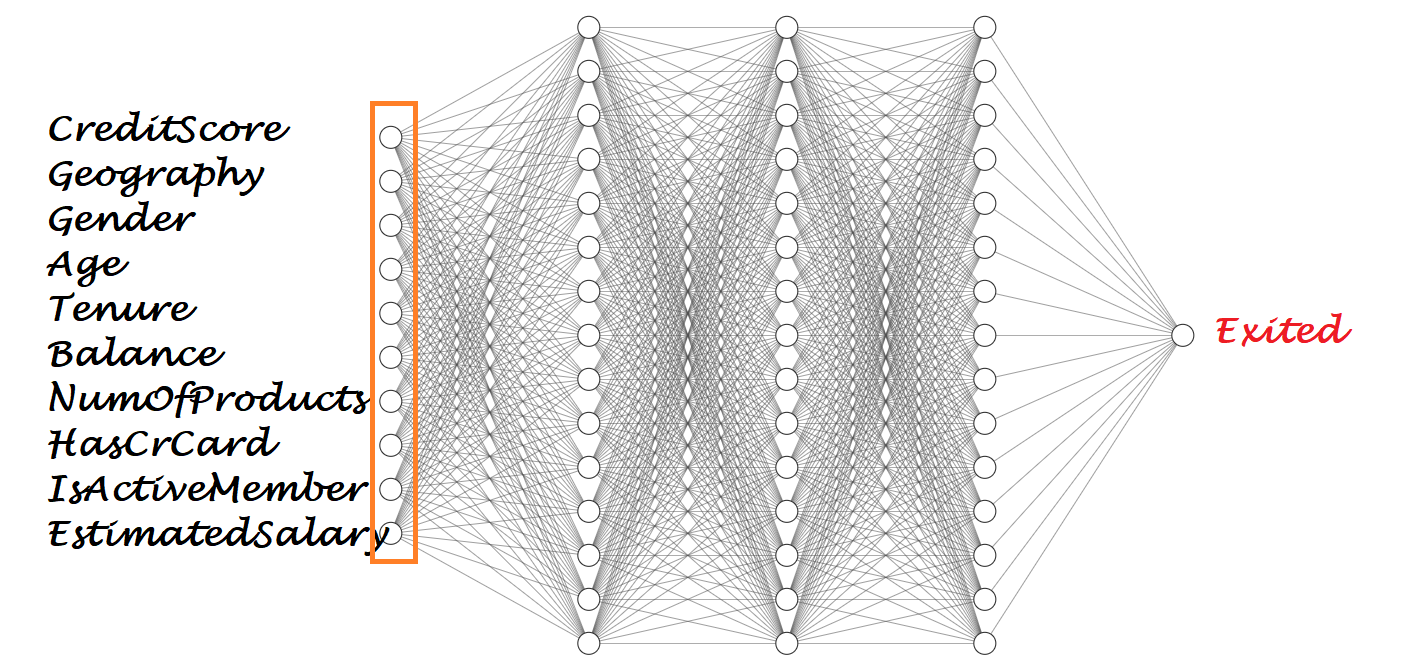

In [5]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

#**Categorical Data - Gender - Label Encoder**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#**Categorical Data - Geography - OneHotEncoder**

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#**Train and Test Data**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#**Feature Selection**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Part II: Artificial Neural Network**

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'2.13.0'

#**Building ANN**

#**Initializing ANN**

In [12]:
ann = tf.keras.models.Sequential()

#**Adding first hidden layer**

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#**Adding the second hidden layer**

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#**Adding the third hidden layer**

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#**Compile ANN**

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#**Training the ANN on the Training set**

In [18]:
ann.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
250/250 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8325
Epoch 2/5
250/250 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8404
Epoch 3/5
250/250 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8489
Epoch 4/5
250/250 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8521
Epoch 5/5
250/250 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8554
